In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

Problem Statement: Customer Chur for Ecommerce

step 1: connecting with google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


step 2: loading the dataset

In [ ]:
# File path from user upload
ecomm=pd.read_csv('/content/drive/MyDrive/IS670_data/E Commerce Dataset.csv')

ecomm.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130


step 3: EDA Read and explore the Data

In [ ]:
 ecomm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [ ]:
ecomm.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.221492
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.193869
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,146.000000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.000000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.000000
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,325.000000


In [ ]:
ecomm.isna().sum()

,0
CustomerID,0
Churn,0
Tenure,264
PreferredLoginDevice,0
CityTier,0
WarehouseToHome,251
PreferredPaymentMode,0
Gender,0
HourSpendOnApp,255
NumberOfDeviceRegistered,0


In [ ]:
ecomm.isna().sum()*100/len(ecomm)

,0
CustomerID,0.000000
Churn,0.000000
Tenure,4.689165
PreferredLoginDevice,0.000000
CityTier,0.000000
WarehouseToHome,4.458259
PreferredPaymentMode,0.000000
Gender,0.000000
HourSpendOnApp,4.529307
NumberOfDeviceRegistered,0.000000


In [ ]:
numerical_col=['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder']

for col in list(numerical_col):
  ecomm[col].fillna(ecomm[col].median(), inplace=True)

In [ ]:
ecomm.isna().sum()*100/len(ecomm)

,0
CustomerID,0.0
Churn,0.0
Tenure,0.0
PreferredLoginDevice,0.0
CityTier,0.0
WarehouseToHome,0.0
PreferredPaymentMode,0.0
Gender,0.0
HourSpendOnApp,0.0
NumberOfDeviceRegistered,0.0


In [ ]:
for col in ecomm.columns:
  print(col)
  print( ecomm[col].unique())
  print("")

CustomerID
[50001 50002 50003 ... 55628 55629 55630]

Churn
[1 0]

Tenure
[ 4.  9.  0. 13. 11. 19. 20. 14.  8. 18.  5.  2. 30.  1. 23.  3. 29.  6.
 26. 28.  7. 24. 25. 10. 15. 22. 27. 16. 12. 21. 17. 50. 60. 31. 51. 61.]

PreferredLoginDevice
['Mobile Phone' 'Phone' 'Computer']

CityTier
[3 1 2]

WarehouseToHome
[  6.   8.  30.  15.  12.  22.  11.   9.  31.  18.  13.  20.  29.  28.
  26.  14.  10.  27.  17.  23.  33.  19.  35.  24.  16.  25.  32.  34.
   5.  21. 126.   7.  36. 127.]

PreferredPaymentMode
['Debit Card' 'UPI' 'CC' 'Cash on Delivery' 'E wallet' 'COD' 'Credit Card']

Gender
['Female' 'Male']

HourSpendOnApp
[3. 2. 1. 0. 4. 5.]

NumberOfDeviceRegistered
[3 4 5 2 1 6]

PreferedOrderCat
['Laptop & Accessory' 'Mobile' 'Mobile Phone' 'Others' 'Fashion' 'Grocery']

SatisfactionScore
[2 3 5 4 1]

MaritalStatus
['Single' 'Divorced' 'Married']

NumberOfAddress
[ 9  7  6  8  3  2  4 10  1  5 19 21 11 20 22]

Complain
[1 0]

OrderAmountHikeFromlastYear
[11. 15. 14. 23. 22. 16. 12. 13

In [ ]:
ecomm['PreferredLoginDevice'].value_counts()

,count
PreferredLoginDevice,
Mobile Phone,2765
Computer,1634
Phone,1231


In [ ]:
category_mapping={'Mobile Phone': 'Phone'}
ecomm['PreferredLoginDevice'] = ecomm['PreferredLoginDevice'].replace(category_mapping)
ecomm['PreferredLoginDevice'].value_counts()

,count
PreferredLoginDevice,
Phone,3996
Computer,1634


In [ ]:
ecomm.replace({'PreferredLoginDevice': {'Mobile Phone' : 0, 'Computer': 1}}, inplace=True)


In [ ]:
ecomm['PreferredPaymentMode'].value_counts()

,count
PreferredPaymentMode,
Debit Card,2314
Credit Card,1501
E wallet,614
UPI,414
COD,365
CC,273
Cash on Delivery,149


In [ ]:
category_mapping={'CC': 'Credit Card'}
ecomm['PreferredPaymentMode'] = ecomm['PreferredPaymentMode'].replace(category_mapping)
ecomm['PreferredPaymentMode'].value_counts()

,count
PreferredPaymentMode,
Debit Card,2314
Credit Card,1774
E wallet,614
UPI,414
COD,365
Cash on Delivery,149


In [ ]:
category_mapping={'Cash on Delivery': 'COD'}
ecomm['PreferredPaymentMode'] = ecomm['PreferredPaymentMode'].replace(category_mapping)
ecomm['PreferredPaymentMode'].value_counts()

,count
PreferredPaymentMode,
Debit Card,2314
Credit Card,1774
E wallet,614
COD,514
UPI,414


In [ ]:
ecomm['Gender'].value_counts()

,count
Gender,
Male,3384
Female,2246


In [ ]:
ecomm['Gender'].replace({'F': 1, 'M': 0}, inplace=True)

In [ ]:
ecomm['PreferedOrderCat'].value_counts()

,count
PreferedOrderCat,
Laptop & Accessory,2050
Mobile Phone,1271
Fashion,826
Mobile,809
Grocery,410
Others,264


In [66]:
category_mapping={'Mobile': 'Phone'}
ecomm['PreferedOrderCat'] = ecomm['PreferedOrderCat'].replace(category_mapping)
ecomm['PreferedOrderCat'].value_counts()

,count
PreferedOrderCat,
Phone,2080
Laptop & Accessory,2050
Fashion,826
Grocery,410
Others,264


In [ ]:
ecomm['MaritalStatus'].value_counts()


,count
MaritalStatus,
Married,2986
Single,1796
Divorced,848


In [ ]:
ecomm['Churn'].value_counts()

,count
Churn,
0,4682
1,948


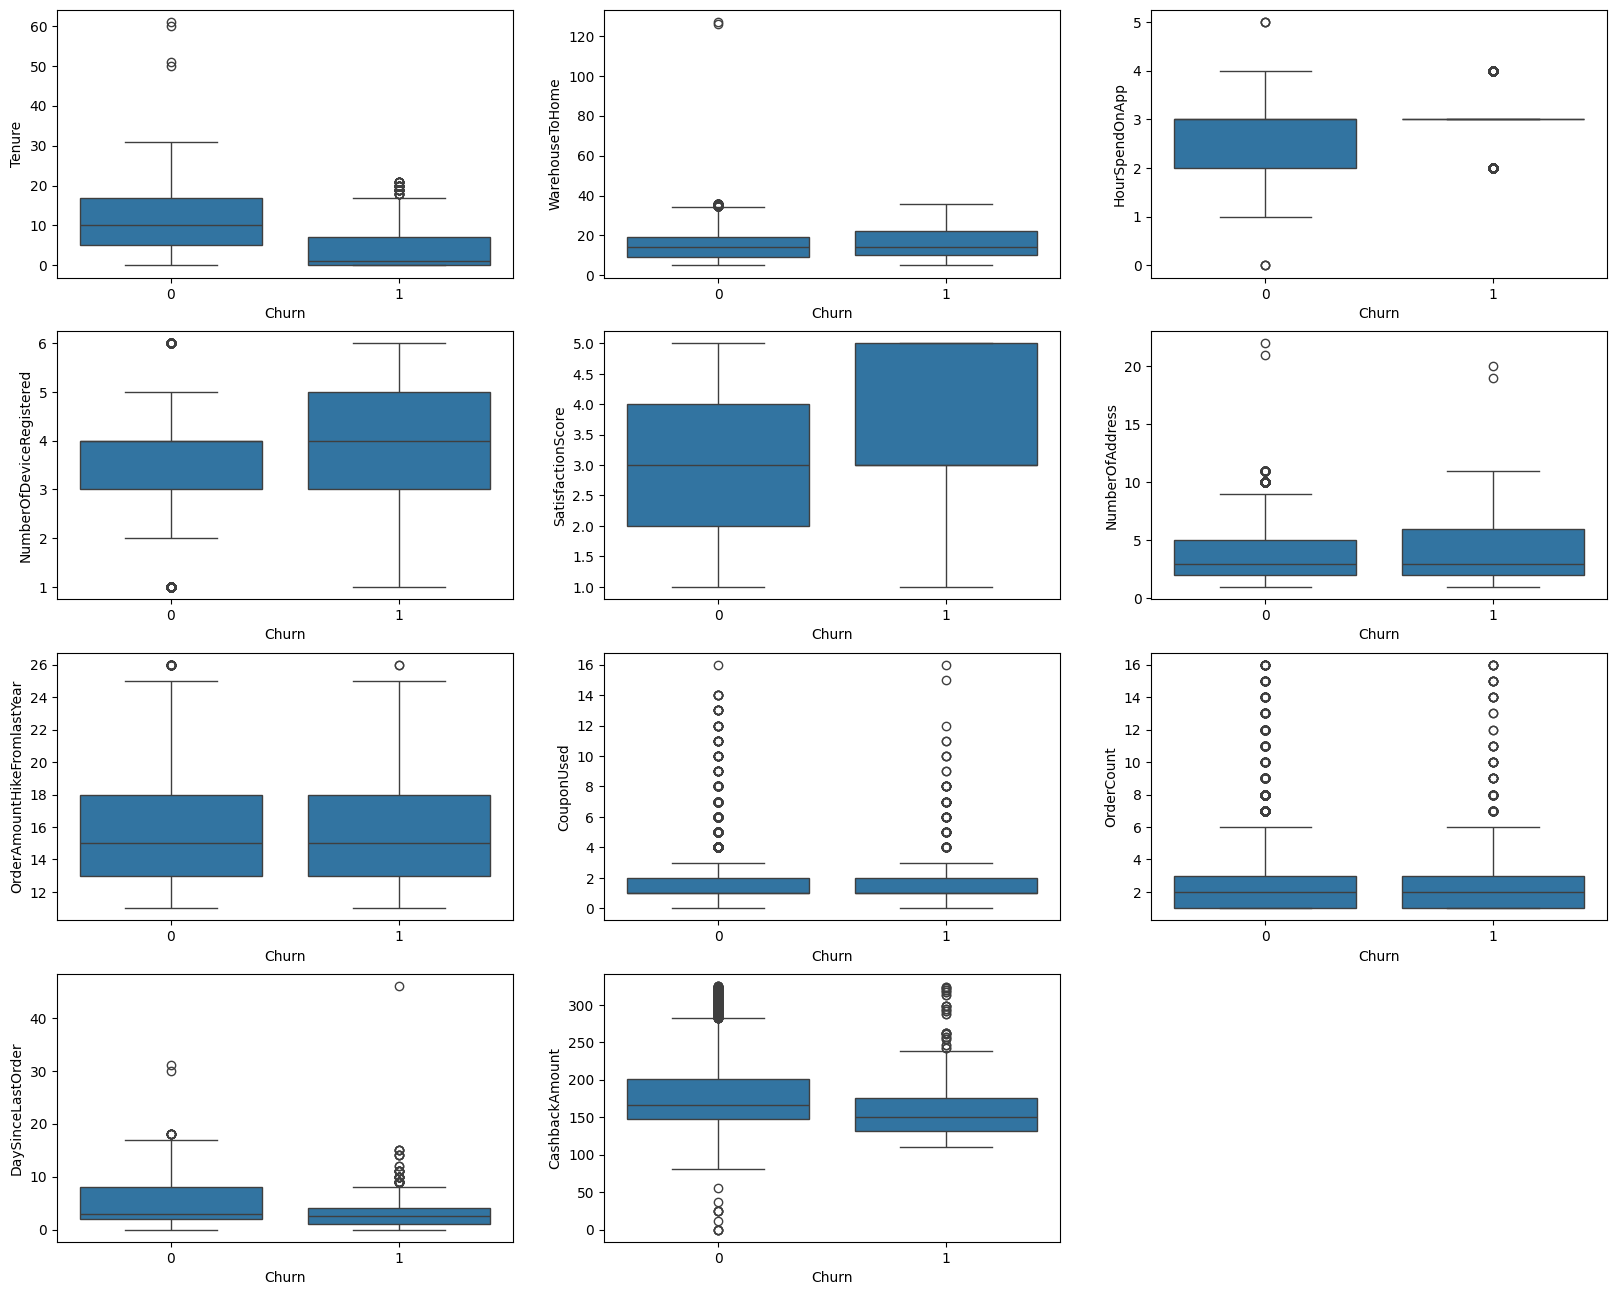

In [ ]:
#visualize numerical value

plt.figure(figsize=(20,16))
plt.subplot(4,3,1)
sns.boxplot(x='Churn', y='Tenure', data=ecomm)
plt.subplot(4,3,2)
sns.boxplot(x='Churn', y='WarehouseToHome', data=ecomm)
plt.subplot(4,3,3)
sns.boxplot(x='Churn', y='HourSpendOnApp', data=ecomm)
plt.subplot(4,3,4)
sns.boxplot(x='Churn', y='NumberOfDeviceRegistered', data=ecomm)
plt.subplot(4,3,5)
sns.boxplot(x='Churn', y='SatisfactionScore', data=ecomm)
plt.subplot(4,3,6)
sns.boxplot(x='Churn', y='NumberOfAddress', data=ecomm)
plt.subplot(4,3,7)
sns.boxplot(x='Churn', y='OrderAmountHikeFromlastYear', data=ecomm)
plt.subplot(4,3,8)
sns.boxplot(x='Churn', y='CouponUsed', data=ecomm)
plt.subplot(4,3,9)
sns.boxplot(x='Churn', y='OrderCount', data=ecomm)
plt.subplot(4,3,10)
sns.boxplot(x='Churn', y='DaySinceLastOrder', data=ecomm)
plt.subplot(4,3,11)
sns.boxplot(x='Churn', y='CashbackAmount', data=ecomm)

plt.show()

In [ ]:
categorical_features=['PreferredPaymentMode', 'PreferedOrderCat', 'MaritalStatus']

In [ ]:
numerical_feactures=['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount', 'PreferredLoginDevice', 'CityTier']

In [ ]:
ecomm_features=ecomm[numerical_feactures+categorical_features + ['Churn']]

ecomm_features.head(10)

,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,PreferredLoginDevice,CityTier,PreferredPaymentMode,PreferedOrderCat,MaritalStatus,Churn
0,4.0,6.0,3.0,3,2,9,11.0,1.0,1.0,5.0,160,Phone,3,Debit Card,Laptop & Accessory,Single,1
1,9.0,8.0,3.0,4,3,7,15.0,0.0,1.0,0.0,121,Phone,1,UPI,Mobile,Single,1
2,9.0,30.0,2.0,4,3,6,14.0,0.0,1.0,3.0,120,Phone,1,Debit Card,Mobile,Single,1
3,0.0,15.0,2.0,4,5,8,23.0,0.0,1.0,3.0,134,Phone,3,Debit Card,Laptop & Accessory,Single,1
4,0.0,12.0,3.0,3,5,3,11.0,1.0,1.0,3.0,130,Phone,1,Credit Card,Mobile,Single,1
5,0.0,22.0,3.0,5,5,2,22.0,4.0,6.0,7.0,139,1,1,Debit Card,Phone,Single,1
6,9.0,11.0,2.0,3,2,4,14.0,0.0,1.0,0.0,121,Phone,3,COD,Laptop & Accessory,Divorced,1
7,9.0,6.0,3.0,3,2,3,16.0,2.0,2.0,0.0,123,Phone,1,Credit Card,Mobile,Divorced,1
8,13.0,9.0,3.0,4,3,2,14.0,0.0,1.0,2.0,127,Phone,3,E wallet,Mobile,Divorced,1
9,9.0,31.0,2.0,5,3,2,12.0,1.0,1.0,1.0,123,Phone,1,Debit Card,Mobile,Single,1


step 4: Create Features from the data

In [ ]:
def train_test_split_and_features(df_feactures):
  x=df_feactures.drop(['Churn'], axis=1)
  y=df_feactures['Churn']
  x=pd.get_dummies(x, dtype=int)
  x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=0)
  print(x.head(5))
  print(x.columns)
  features=list(x.columns)

  return x_train, x_test, y_train, y_test, features


In [ ]:
x_train, x_test, y_train, y_test, features=train_test_split_and_features(ecomm_features)

   Tenure  WarehouseToHome  HourSpendOnApp  NumberOfDeviceRegistered  \
0     4.0              6.0             3.0                         3   
1     9.0              8.0             3.0                         4   
2     9.0             30.0             2.0                         4   
3     0.0             15.0             2.0                         4   
4     0.0             12.0             3.0                         3   

   SatisfactionScore  NumberOfAddress  OrderAmountHikeFromlastYear  \
0                  2                9                         11.0   
1                  3                7                         15.0   
2                  3                6                         14.0   
3                  5                8                         23.0   
4                  5                3                         11.0   

   CouponUsed  OrderCount  DaySinceLastOrder  ...  PreferredPaymentMode_UPI  \
0         1.0         1.0                5.0  ...                  

In [ ]:
x_train.head()

,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,...,PreferredPaymentMode_UPI,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Others,PreferedOrderCat_Phone,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
1294,15.0,24.0,2.0,3,5,7,17.0,0.0,1.0,2.0,...,0,0,0,1,0,0,0,0,1,0
3904,18.0,9.0,4.0,2,1,3,20.0,7.0,7.0,8.0,...,0,1,0,0,0,0,0,0,1,0
3523,1.0,13.0,3.0,5,3,3,14.0,3.0,3.0,3.0,...,0,0,0,0,0,0,1,1,0,0
2100,18.0,17.0,2.0,3,1,4,13.0,1.0,1.0,1.0,...,0,0,1,0,0,0,0,0,1,0
4481,5.0,14.0,4.0,4,1,6,13.0,1.0,2.0,8.0,...,0,0,0,1,0,0,0,0,1,0


Step 5/: Fit and evaluate the model

In [ ]:
def fit_and_evaluate_model(x_train, x_test, y_train, y_test, max_depth=5, min_samples_split=0.1, max_features=0.8, max_samples=0.8):
  random_forest=RandomForestClassifier(random_state=0,\
                                       max_depth=max_depth,\
                                       min_samples_split=min_samples_split,\
                                       max_features=max_features,\
                                       max_samples=max_samples)
  model= random_forest.fit(x_train, y_train)
  random_forest_predict=random_forest.predict(x_test)
  random_forest_conf_matrix= confusion_matrix(y_test, random_forest_predict)
  random_forest_acc_score=accuracy_score(y_test, random_forest_predict)
  print("Confusion Matrix")
  print(random_forest_conf_matrix)
  print("")
  print("Accuracy of Random Forest:", random_forest_acc_score*100, '\n')
  print(classification_report(y_test, random_forest_predict))
  return model


In [ ]:
model=fit_and_evaluate_model(x_train, x_test, y_train, y_test)

Confusion Matrix
[[913  26]
 [130  57]]

Accuracy of Random Forest: 86.14564831261102 

              precision    recall  f1-score   support

           0       0.88      0.97      0.92       939
           1       0.69      0.30      0.42       187

    accuracy                           0.86      1126
   macro avg       0.78      0.64      0.67      1126
weighted avg       0.84      0.86      0.84      1126



Step 6: Try Diff parameters to identify best ones

In [ ]:
param_grid = [
    {'max_depth':[3, 5,7 ,10], 'min_samples_split':[0.01, 0.03, 0.07, 0.1],
     'max_features':[0.7, 0.8, 0.9, 1.0], 'max_samples':[0.7, 0.8, 0.9, 1.0]}
]


In [ ]:
from sklearn.model_selection import GridSearchCV
model=RandomForestClassifier(random_state=0)
grid_search=GridSearchCV(model, param_grid, cv=5, verbose=5)
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 256 candidates, totalling 1280 fits
[CV 1/5] END max_depth=3, max_features=0.7, max_samples=0.7, min_samples_split=0.01;, score=0.887 total time=   0.6s
[CV 2/5] END max_depth=3, max_features=0.7, max_samples=0.7, min_samples_split=0.01;, score=0.887 total time=   0.6s
[CV 3/5] END max_depth=3, max_features=0.7, max_samples=0.7, min_samples_split=0.01;, score=0.882 total time=   0.6s
[CV 4/5] END max_depth=3, max_features=0.7, max_samples=0.7, min_samples_split=0.01;, score=0.872 total time=   0.6s
[CV 5/5] END max_depth=3, max_features=0.7, max_samples=0.7, min_samples_split=0.01;, score=0.863 total time=   0.7s
[CV 1/5] END max_depth=3, max_features=0.7, max_samples=0.7, min_samples_split=0.03;, score=0.885 total time=   0.7s
[CV 2/5] END max_depth=3, max_features=0.7, max_samples=0.7, min_samples_split=0.03;, score=0.887 total time=   0.6s
[CV 3/5] END max_depth=3, max_features=0.7, max_samples=0.7, min_samples_split=0.03;, score=0.881 total time=   0.6s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid=[{'max_depth': [3, 5, 7, 10],
                          'max_features': [0.7, 0.8, 0.9, 1.0],
                          'max_samples': [0.7, 0.8, 0.9, 1.0],
                          'min_samples_split': [0.01, 0.03, 0.07, 0.1]}],
             verbose=5)

In [ ]:
results=pd.DataFrame(grid_search.cv_results_)
results.sort_values(by='mean_test_score', inplace=True)
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_max_samples,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
59,0.467868,0.008005,0.011765,0.000329,3,1.0,0.9,0.1,"{'max_depth': 3, 'max_features': 1.0, 'max_sam...",0.862375,0.863485,0.866815,0.867925,0.847778,0.861675,0.007244,245
251,0.990729,0.193273,0.018184,0.003739,10,1.0,0.9,0.1,"{'max_depth': 10, 'max_features': 1.0, 'max_sa...",0.862375,0.863485,0.866815,0.867925,0.847778,0.861675,0.007244,245
247,0.779429,0.013151,0.014329,0.000248,10,1.0,0.8,0.1,"{'max_depth': 10, 'max_features': 1.0, 'max_sa...",0.862375,0.863485,0.866815,0.867925,0.847778,0.861675,0.007244,245
55,0.673345,0.008468,0.017673,0.001558,3,1.0,0.8,0.1,"{'max_depth': 3, 'max_features': 1.0, 'max_sam...",0.862375,0.863485,0.866815,0.867925,0.847778,0.861675,0.007244,245
243,0.715148,0.010407,0.014116,0.000317,10,1.0,0.7,0.1,"{'max_depth': 10, 'max_features': 1.0, 'max_sa...",0.862375,0.863485,0.866815,0.867925,0.847778,0.861675,0.007244,245


In [ ]:
results_save=pd.DataFrame(grid_search.cv_results_)

In [ ]:
grid_search.best_params_

{'max_depth': 10,
 'max_features': 0.8,
 'max_samples': 1.0,
 'min_samples_split': 0.01}

Step 6:Evaluate the model with best parameters

In [ ]:
model=fit_and_evaluate_model(x_train, x_test, y_train, y_test, max_depth=10, min_samples_split=0.01, max_features=0.7, max_samples=1.0)
#

Confusion Matrix
[[901  38]
 [ 88  99]]

Accuracy of Random Forest: 88.80994671403198 

              precision    recall  f1-score   support

           0       0.91      0.96      0.93       939
           1       0.72      0.53      0.61       187

    accuracy                           0.89      1126
   macro avg       0.82      0.74      0.77      1126
weighted avg       0.88      0.89      0.88      1126



In [ ]:
importances=pd.DataFrame(model.feature_importances_)
importances['features']=features
importances.columns=['importance', 'features']
importances.sort_values(by='importance', ascending=False, inplace=True)
importances.head()

,importance,features
0,0.449644,Tenure
5,0.086948,NumberOfAddress
9,0.080694,DaySinceLastOrder
10,0.079847,CashbackAmount
1,0.047335,WarehouseToHome


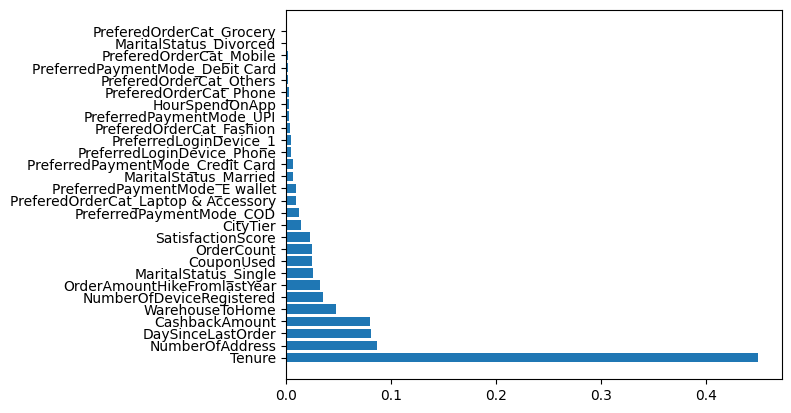

In [ ]:
plt.barh(importances['features'], importances['importance'])
plt.show()

In [65]:
!jupyter nbconvert --to html "/content/drive/MyDrive/Deep Learning/Customer_Churn.ipynb"

[NbConvertApp] Converting notebook /content/drive/MyDrive/Deep Learning/Customer_Churn.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 2 image(s).
[NbConvertApp] Writing 830387 bytes to /content/drive/MyDrive/Deep Learning/Customer_Churn.html
